In [2]:
import pandas as pd
salary = pd.read_csv("502+Case2+Dataset.csv")

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [3]:
print(salary)

     Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Dat

Q1. How does where you live affect your salary?

<Axes: xlabel='employee_residence'>

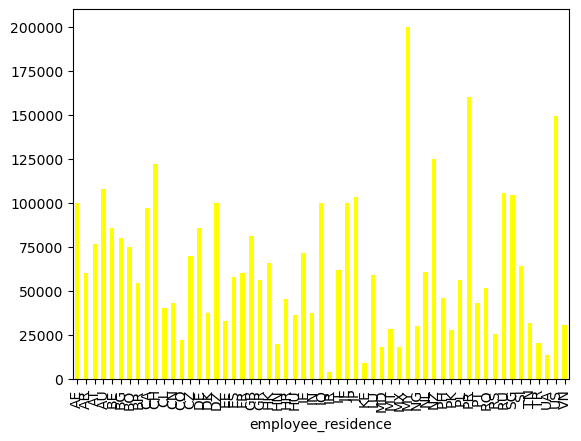

In [5]:
salary.groupby("employee_residence").salary_in_usd.mean().plot.bar(color='yellow')

Q2. How has the demand of the jobs been throughout the years?

In [6]:
salary.groupby(['work_year'])['job_title'].agg(pd.Series.mode)

work_year
2020    Data Scientist
2021    Data Scientist
2022     Data Engineer
Name: job_title, dtype: object

<Axes: xlabel='work_year'>

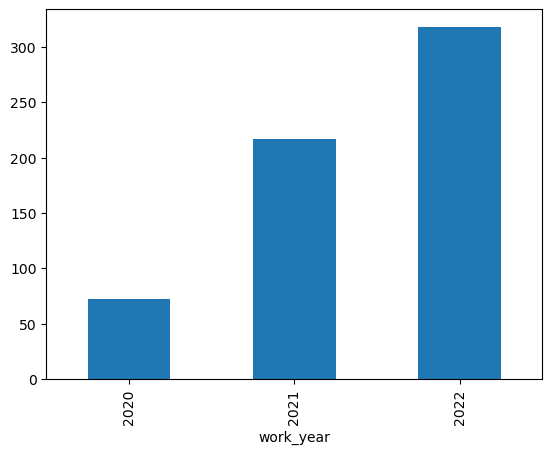

In [8]:
salary.groupby(['work_year'])['job_title'].count().plot.bar()

Q3. How common is to work remote?

<Axes: ylabel='remote_ratio'>

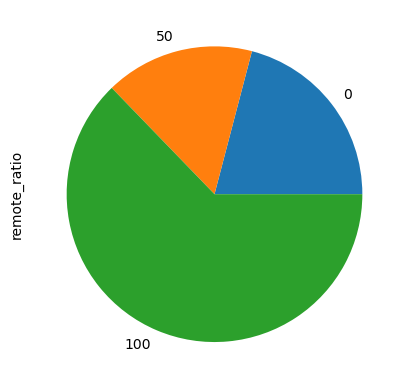

In [9]:
salary.groupby(['remote_ratio'])['remote_ratio'].count().plot.pie()

Q4. What the highest paying jobs with entry level as well as for senior level experienced?

In [11]:
salary['salary_in_usd_max'] = salary.groupby(['experience_level', 'job_title'])['salary_in_usd'].transform(max)

In [16]:
salary.groupby(['experience_level','job_title'])['salary_in_usd_max'].agg(pd.Series.mode)

experience_level  job_title                         
EN                AI Scientist                           45896
                  Applied Data Scientist                110037
                  Applied Machine Learning Scientist     31875
                  BI Data Analyst                        55000
                  Big Data Engineer                      70000
                                                         ...  
SE                Principal Data Analyst                170000
                  Principal Data Engineer               200000
                  Principal Data Scientist              235000
                  Research Scientist                    144000
                  Staff Data Scientist                  105000
Name: salary_in_usd_max, Length: 105, dtype: int64

Q5. What company size hire the most?

<Axes: ylabel='job_title'>

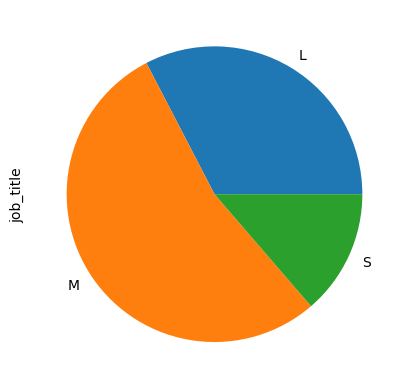

In [17]:
salary.groupby(['company_size'])['job_title'].count().plot.pie()

Q6. 6. How has average salary changed throughout the years?

<Axes: xlabel='work_year'>

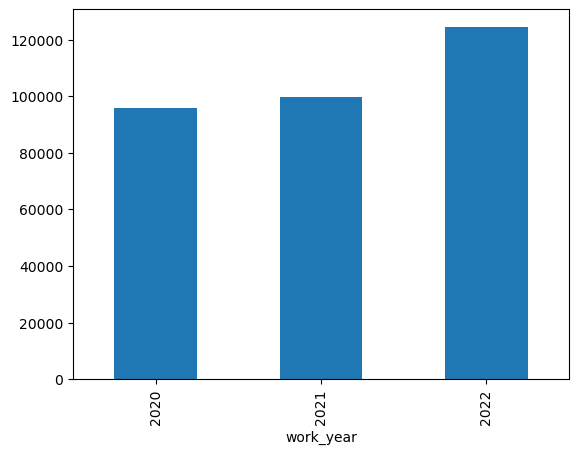

In [19]:
salary.groupby("work_year").salary_in_usd.mean().plot.bar()

Q7. What are most popular roles in Data Science ?

<Axes: xlabel='job_title'>

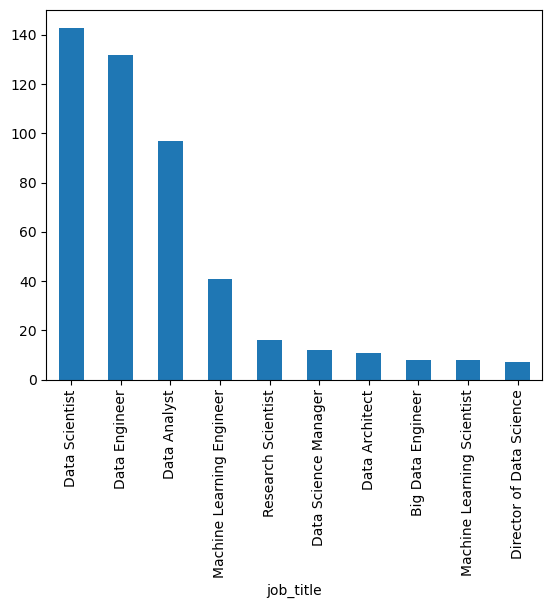

In [25]:
popular=salary.groupby(['job_title'])['job_title'].count().sort_values(ascending=False)

popular.iloc[:10].plot.bar()

Q8. Which country hire the most people in Data Science? 

<Axes: xlabel='company_location'>

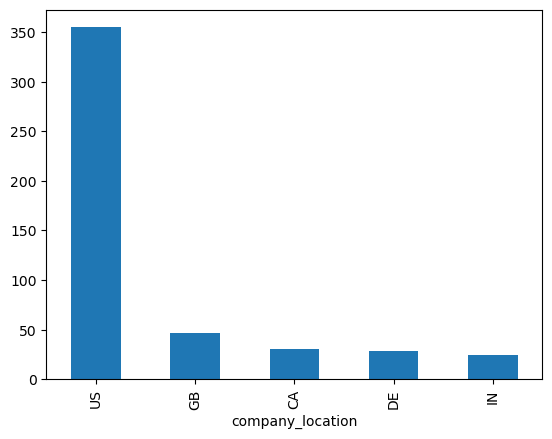

In [27]:
popular_country = salary.groupby(['company_location'])['company_location'].count().sort_values(ascending=False)

popular_country.iloc[:5].plot.bar()

Q9. What is the distribution of Salaries?

In [29]:
print(salary)

     Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Dat

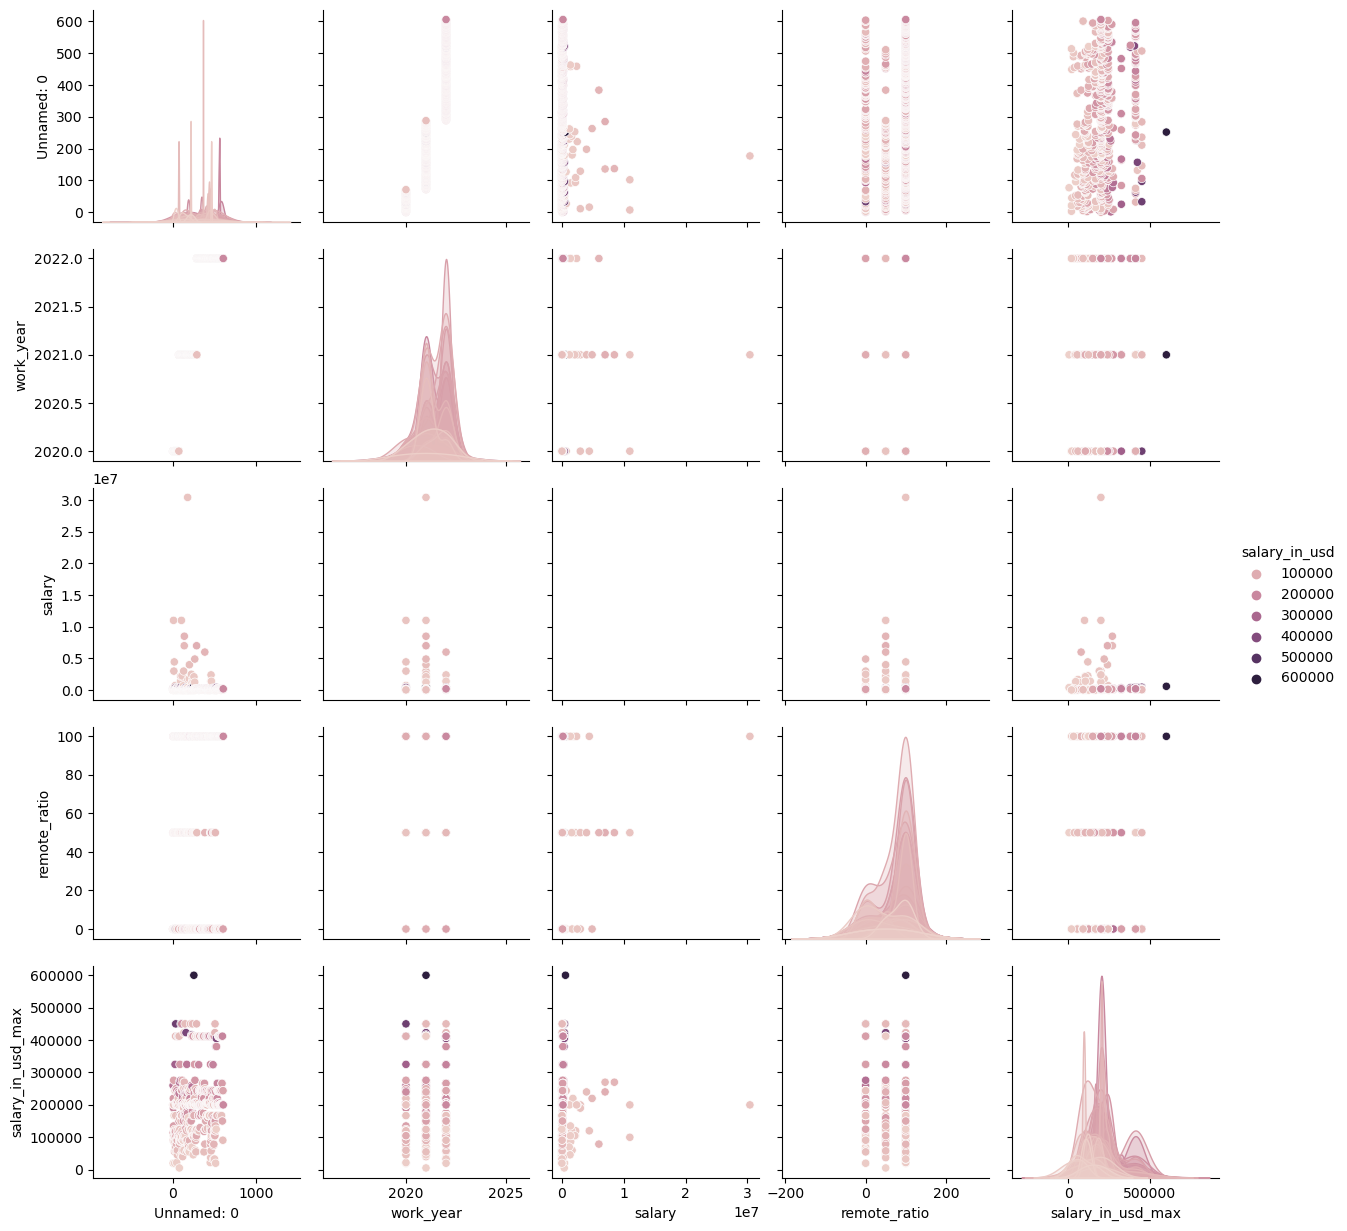

In [33]:
sns.pairplot(salary, hue='salary_in_usd')
plt.show()

Q.10 How much can you expect depending on your years of experience?

<Axes: xlabel='experience_level'>

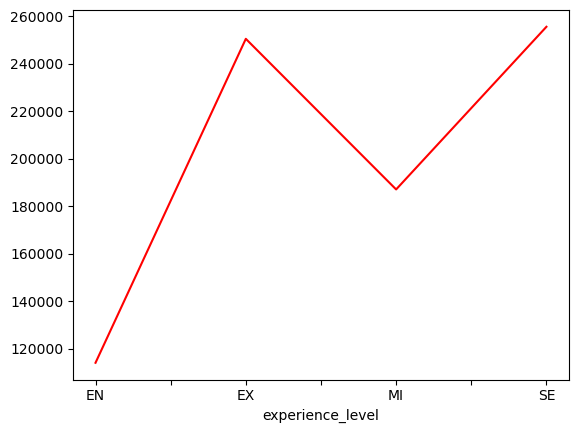

In [41]:
salary.groupby("experience_level").salary_in_usd_max.mean().plot.line(color='red')

Q.11 Which year do people prefer to stay at home the most?

In [6]:
salary.loc[salary['remote_ratio'] ==100, 'remote?'] = '1'

<Axes: ylabel='remote?'>

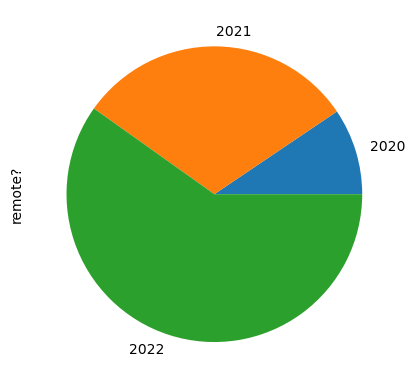

In [9]:
salary.groupby(['work_year'])['remote?'].count().plot.pie()

Q12. Which country has the highest pay?

<Axes: xlabel='company_location'>

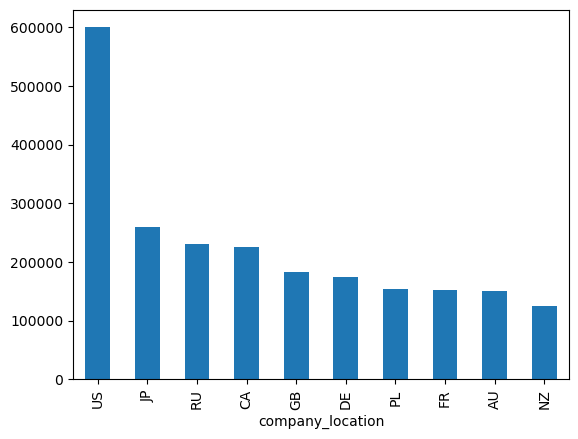

In [12]:
highest_pay = salary.groupby(['company_location'])['salary_in_usd'].max().sort_values(ascending=False)

highest_pay.iloc[:10].plot.bar()

Q13. Which job title has the highest pay?

<Axes: xlabel='job_title'>

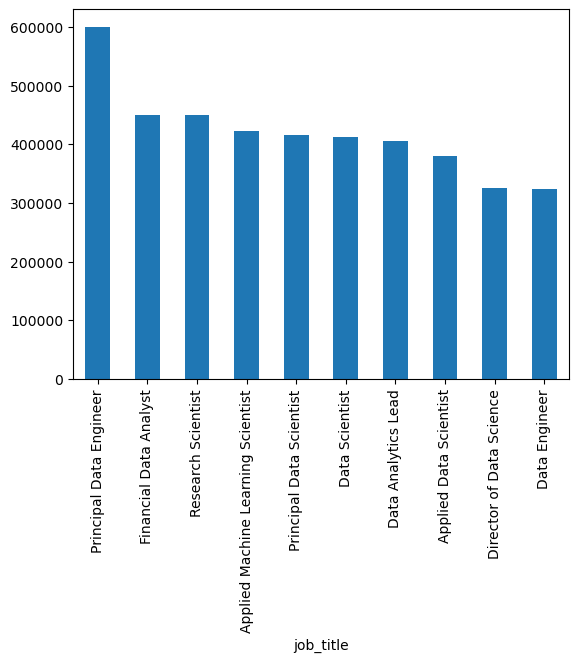

In [13]:
highest_pay_job = salary.groupby(['job_title'])['salary_in_usd'].max().sort_values(ascending=False)

highest_pay_job.iloc[:10].plot.bar()

Q14. Is freelancing is worth or not?

<Axes: xlabel='employment_type'>

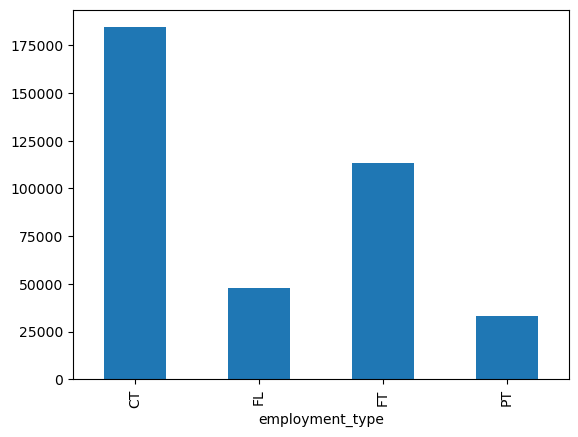

In [17]:
salary.groupby("employment_type").salary_in_usd.mean().plot.bar()